
# The Dataset and The Problem to Solve


>In this notebbok, we’ll use an twitter airline sentiment data. The dataset contains 2 columns (review and sentiment) that will help us identify whether a review is positive or negative.
>
>*Problem formulation: Our goal is to find which machine learning model is best suited to predict sentiment (output) given a movie review (input).*


# 1. Importing necessary libraries


In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')


# 2. Preparing the data

In [2]:
df_review = pd.read_csv("airline_sentiment_analysis.csv")
df_review

,Unnamed: 0,airline_sentiment,text
0,1,positive,@VirginAmerica plus you've added commercials t...
1,3,negative,@VirginAmerica it's really aggressive to blast...
2,4,negative,@VirginAmerica and it's a really big bad thing...
3,5,negative,@VirginAmerica seriously would pay $30 a fligh...
4,6,positive,"@VirginAmerica yes, nearly every time I fly VX..."
...,...,...,...
11536,14633,negative,@AmericanAir my flight was Cancelled Flightled...
11537,14634,negative,@AmericanAir right on cue with the delays👌
11538,14635,positive,@AmericanAir thank you we got on a different f...
11539,14636,negative,@AmericanAir leaving over 20 minutes Late Flig...


This dataset contains 50000 rows; however, to train our model faster in the following steps, we’re going to take a smaller sample of 10000 rows. This small sample will contain 9000 positive and 1000 negative reviews to make the data imbalanced (so I can teach you undersampling and oversampling techniques in the next step)

In [3]:
df_positive = df_review[df_review['airline_sentiment']=='positive'][:9000]
df_negative = df_review[df_review['airline_sentiment']=='negative'][:1000]

df_review_imb = pd.concat([df_positive,df_negative ])

## Dealing with Imbalanced Classes

In most cases, you’ll have a large amount of data for one class, and much fewer observations for other classes. This is known as imbalanced data because the number of observations per class is not equally distributed.

Let’s take a look at how our df_review_imb dataset is distributed.

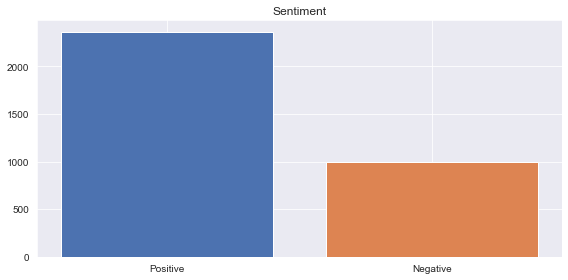

In [4]:
colors = sns.color_palette('deep')

plt.figure(figsize=(8,4), tight_layout=True)
plt.bar(x=['Positive', 'Negative'],
        height=df_review_imb.value_counts(['airline_sentiment']),
        color=colors[:2])
plt.title('Sentiment')
plt.savefig('sentiment.png')
plt.show()

To resample our data we use the imblearn library. You can either undersample positive reviews or oversample negative reviews (you need to choose based on the data you’re working with). In this case, we’ll use the RandomUnderSampler

In [5]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state= 0)
df_review_bal,df_review_bal['airline_sentiment']=rus.fit_resample(df_review_imb[['text']],df_review_imb['airline_sentiment'])


df_review_bal

,text,airline_sentiment
0,@VirginAmerica it's really aggressive to blast...,negative
1,@VirginAmerica and it's a really big bad thing...,negative
2,@VirginAmerica seriously would pay $30 a fligh...,negative
3,@VirginAmerica SFO-PDX schedule is still MIA.,negative
4,@VirginAmerica I flew from NYC to SFO last we...,negative
...,...,...
1995,@JetBlue Hi! Just wanted to see if you have an...,positive
1996,@united please do! She went above and beyond w...,positive
1997,"@AmericanAir thanks. I actually made it, my c...",positive
1998,@AmericanAir This is exactly why ill be flying...,positive


We can compare the imbalanced and balanced dataset with the following code.

In [6]:
print(df_review_imb.value_counts('airline_sentiment'))
print(df_review_bal.value_counts('airline_sentiment'))

airline_sentiment
positive    2363
negative    1000
dtype: int64
airline_sentiment
negative    1000
positive    1000
dtype: int64



## Splitting data into train and test set


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
class train_test_datasets:
   # def __init__(self,dataset):
    #    self.dataset=dataset
    def get_dataset(dataset):
        train,test=train_test_split(dataset,test_size=0.33,random_state=42)
        return train,test
train,test=train_test_datasets.get_dataset(df_review_bal)

In [9]:
train.head()

,text,airline_sentiment
81,@VirginAmerica You have any flights flying int...,negative
915,@united your seats are god awful.,negative
1018,@USAirways Thank you. And thanks for being so ...,positive
380,@united Well the bar is set low! You guys are ...,negative
1029,@SouthwestAir Make the world a better place: V...,positive


In [10]:
test.head()

,text,airline_sentiment
1860,"@AmericanAir - Whoooo Hooooo just crossed 25,3...",positive
353,@united Lost bag process is broken. Agent prom...,negative
1333,@AmericanAir I don't think you should help him...,positive
905,"@united, you just caused a riot on the airplan...",negative
1289,@united DM sent. Thanks.,positive


In [11]:
train_x, train_y = train['text'], train['airline_sentiment']
test_x, test_y = test['text'], test['airline_sentiment']

In [12]:
train_y.value_counts()

negative    675
positive    665
Name: airline_sentiment, dtype: int64


# 3.Text Representation (Bag of words)


Classifiers and learning algorithms expect numerical feature vectors rather than raw text documents. This is why we need to turn our movie review text into numerical vectors.

we’ll use bag of words (BOW) since we care about the frequency of the words in text reviews; however, the order of words is irrelevant. Two common ways to represent bag of words are CountVectorizer and Term Frequency, Inverse Document Frequency (TF-IDF)

we want to identify unique/representative words for positive reviews and negative reviews, so we’ll choose the TF-IDF. To turn text data into numerical vectors with TF-IDF

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')
train_x_vector = tfidf.fit_transform(train_x)
# also fit the test_x_vector
test_x_vector = tfidf.transform(test_x)


Finally, let's also transform the test_x_vector, so we can test the accuracy of the model later 

In [14]:
pd.DataFrame.sparse.from_spmatrix(train_x_vector,
                                  index=train_x.index,
                                  columns=tfidf.get_feature_names())

C:\Users\sunna\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,00,000,000419,0016,00pm,0162389030167,0162424965446,05,0prgysvurm,10,...,yr,yvonne,yxn00pnoav,yyz,zambia,zcbjyo6lsn,zcc82u,zero,zf5wjgtxzt,zone
81,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
915,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1018,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1294,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 4.Model Selection

In our example, our input (review) and output (sentiment) are clearly identified, so we can say we have labeled input and output data; therefore, we’re dealing with supervised learning.

We will benchmark the four classification models.



##  Support Vector Machine(SVM)


In [15]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
class svc_model:
    def __init__(self,train_x_vector,train_y,test_x_vector,test_y):
        self.train_x_vector=train_x_vector
        self.train_y=train_y
        self.test_x_vector=test_x_vector
        self.test_y=test_y
        
    def model():
        classifier_svm=SVC(kernel='linear',probability=True)
        classifier_svm.fit(train_x_vector,train_y)
        tweet=input()
        print("probability for the input to be positive or negative")
        prediction_prob=classifier_svm.predict_proba(tfidf.transform([str(tweet)]))
        print(prediction_prob)
        print("prediction of the model")
        prediction=classifier_svm.predict(tfidf.transform([str(tweet)]))
        print(prediction)
        print("classification report")
        print(classification_report(test_y,
                            classifier_svm.predict(test_x_vector),
                            labels = ['positive','negative']))
        print("accuracy_of_model")
        print(classifier_svm.score(test_x_vector,test_y))

In [16]:
model1=svc_model.model()

 good


probability for the input to be positive or negative
[[0.02545117 0.97454883]]
prediction of the model
['positive']
classification report
              precision    recall  f1-score   support

    positive       0.96      0.88      0.92       335
    negative       0.89      0.97      0.93       325

    accuracy                           0.92       660
   macro avg       0.93      0.92      0.92       660
weighted avg       0.93      0.92      0.92       660

accuracy_of_model
0.9242424242424242



## Decision Tree


In [17]:
from sklearn.tree import DecisionTreeClassifier

class dec_tree_model:
    def __init__(self,train_x_vector,train_y,test_x_vector,test_y):
        self.train_x_vector=train_x_vector
        self.train_y=train_y
        self.test_x_vector=test_x_vector
        self.test_y=test_y
    def model():
        dec_tree = DecisionTreeClassifier()
        dec_tree.fit(train_x_vector,train_y)
        tweet=input()
        print("probability for the input to be positive or negative")
        prediction_prob=dec_tree.predict_proba(tfidf.transform([str(tweet)]))
        print(prediction_prob)
        print("prediction of the model")
        prediction=dec_tree.predict(tfidf.transform([str(tweet)]))
        print(prediction)
        print("classification report")
        print(classification_report(test_y,
                            dec_tree.predict(test_x_vector),
                            labels = ['positive','negative']))
        print("accuracy_of_model")
        print(dec_tree.score(test_x_vector,test_y))

In [19]:
model2=dec_tree_model.model()
#classification_report=dec_tree_model.classification_report()
#accuracy=model.accuracy_report()

 bad flight


probability for the input to be positive or negative
[[0. 1.]]
prediction of the model
['positive']
classification report
              precision    recall  f1-score   support

    positive       0.90      0.90      0.90       335
    negative       0.90      0.90      0.90       325

    accuracy                           0.90       660
   macro avg       0.90      0.90      0.90       660
weighted avg       0.90      0.90      0.90       660

accuracy_of_model
0.9015151515151515



## Logistic Regression


In [33]:
from sklearn.linear_model import LogisticRegression


class log_reg_model:
    def __init__(self,train_x_vector,train_y,test_x_vector,test_y):
        self.train_x_vector=train_x_vector
        self.train_y=train_y
        self.test_x_vector=test_x_vector
        self.test_y=test_y
    def model():
        log_reg = LogisticRegression()
        log_reg.fit(train_x_vector,train_y)
        tweet=input()
        print("probability for the input to be positive or negative")
        prediction_prob=log_reg.predict_proba(tfidf.transform([str(tweet)]))
        print(prediction_prob)
        print("prediction of the model")
        prediction=log_reg.predict(tfidf.transform([str(tweet)]))
        print(prediction)
        print("classification report")
        print(classification_report(test_y,
                            log_reg.predict(test_x_vector),
                            labels = ['positive','negative']))
        print("accuracy_of_model")
        print(log_reg.score(test_x_vector,test_y))

In [34]:
model2=log_reg_model.model()
#classification_report=dec_tree_model.classification_report()
#accuracy=model.accuracy_report()

 good flight


probability for the input to be positive or negative
[[0.42551919 0.57448081]]
prediction of the model
['positive']
classification report
              precision    recall  f1-score   support

    positive       0.98      0.86      0.91       335
    negative       0.87      0.98      0.92       325

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660

accuracy_of_model
0.9166666666666666


>Note: Here notice that we are using review dataframe in vectorized form and sentiment dataframe in normal form it is so that model evaluates the vectorized values of review dataframe and gives out output in normal english not in a vectorized form so that it can be readable to us

## LGBM

In [35]:
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

class lgbm_model:
    def __init__(self,train_x_vector,train_y,test_x_vector,test_y):
        self.train_x_vector=train_x_vector
        self.train_y=train_y
        self.test_x_vector=test_x_vector
        self.test_y=test_y
    def model():
        rs_cv=lgb.LGBMClassifier()
        rs_cv.fit(train_x_vector,train_y)
        tweet=input()
        print("probability for the input to be positive or negative")
        prediction_prob=rs_cv.predict_proba(tfidf.transform([str(tweet)]))
        print(prediction_prob)
        print("prediction of the model")
        prediction=rs_cv.predict(tfidf.transform([str(tweet)]))
        print(prediction)
        print("classification report")
        print(classification_report(test_y,
                            rs_cv.predict(test_x_vector),
                            labels = ['positive','negative']))
        print("accuracy_of_model")
        print(rs_cv.score(test_x_vector,test_y))


In [36]:
model2=lgbm_model.model()
#classification_report=dec_tree_model.classification_report()
#accuracy=model.accuracy_report()

 good flight and bad staff


probability for the input to be positive or negative
[[3.96132166e-04 9.99603868e-01]]
prediction of the model
['positive']
classification report
              precision    recall  f1-score   support

    positive       0.95      0.90      0.92       335
    negative       0.90      0.95      0.92       325

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660

accuracy_of_model
0.9227272727272727


## XGBoost

In [40]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

class xg_model:
    def __init__(self,train_x_vector,train_y,test_x_vector,test_y):
        self.train_x_vector=train_x_vector
        self.train_y=train_y
        self.test_x_vector=test_x_vector
        self.test_y=test_y
    def model():
        xgb = XGBClassifier()
        y_train = le.fit_transform(train_y)
        xgb.fit(train_x_vector,y_train)
        tweet=input()
        print("probability for the input to be positive or negative")
        prediction_prob=xgb.predict_proba(tfidf.transform([str(tweet)]))
        print(prediction_prob)
        print("prediction of the model")
        prediction=xgb.predict(tfidf.transform([str(tweet)]))
        print(prediction)
        print("classification report")
        y_test = le.fit_transform(test_y)
        print(classification_report(y_test,
                            xgb.predict(test_x_vector)))
        print("accuracy_of_model")
        print(xgb.score(test_x_vector,y_test))

In [41]:
model2=xg_model.model()
#classification_report=dec_tree_model.classification_report()
#accuracy=model.accuracy_report()

 good plane 


probability for the input to be positive or negative
[[2.2619963e-04 9.9977380e-01]]
prediction of the model
[1]
classification report
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       325
           1       0.92      0.91      0.91       335

    accuracy                           0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.91      0.91      0.91       660

accuracy_of_model
0.9136363636363637


## Mean Accuracy

SVM and XGBoost perform better than the other classifiers, with SVM having a slight advantage (92% of accuracy).we'll know make the paramter tuning and bring the best out of the models and evaluate them.

## F1 Score

F1 Score is the weighted average of Precision and Recall. Accuracy is used when the True Positives and True negatives are more important while F1-score is used when the False Negatives and False Positives are crucial. Also, F1 takes into account how the data is distributed, so it’s useful when you have data with imbalance classes.


# 6. Tuning the Model


## Randomsearchcv

This is technique consists of an exhaustive search on specified parameters in order to obtain the optimum values of hyperparameters.

In [43]:
# RANDOM SEARCH FOR 20 COMBINATIONS OF PARAMETERS
from sklearn.model_selection import  RandomizedSearchCV 
from sklearn.svm import SVC
svc = SVC(kernel='linear')
from scipy import stats

rand_list = {"C": stats.uniform(2, 10),
             "gamma": stats.uniform(0.1, 1)}
              
rand_search = RandomizedSearchCV(svc, param_distributions = rand_list, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017) 
rand_search.fit(train_x_vector, train_y) 


RandomizedSearchCV(cv=3, estimator=SVC(kernel='linear'), n_iter=20, n_jobs=4,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A554D60580>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001A554D63430>},
                   random_state=2017)

In [44]:
print(rand_search.best_params_)
print(rand_search.best_estimator_)

{'C': 2.209602254061174, 'gamma': 0.8670701646824878}
SVC(C=2.209602254061174, gamma=0.8670701646824878, kernel='linear')


In [47]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report
class updated_svc_model:
    def __init__(self,train_x_vector,train_y,test_x_vector,test_y):
        self.train_x_vector=train_x_vector
        self.train_y=train_y
        self.test_x_vector=test_x_vector
        self.test_y=test_y
        
    def model():
        classifier_svm=SVC(kernel='linear',probability=True,C=2.209602254061174, gamma=0.8670701646824878)
        classifier_svm.fit(train_x_vector,train_y)
        tweet=input()
        print("probability for the input to be positive or negative")
        prediction_prob=classifier_svm.predict_proba(tfidf.transform([str(tweet)]))
        print(prediction_prob)
        print("prediction of the model")
        prediction=classifier_svm.predict(tfidf.transform([str(tweet)]))
        print(prediction)
        print("classification report")
        print(classification_report(test_y,
                            classifier_svm.predict(test_x_vector),
                            labels = ['positive','negative']))
        print("accuracy_of_model")
        print(classifier_svm.score(test_x_vector,test_y))

In [48]:
model2=updated_svc_model.model()
#classification_report=dec_tree_model.classification_report()
#accuracy=model.accuracy_report()

 good flight but bad service


probability for the input to be positive or negative
[[0.45325808 0.54674192]]
prediction of the model
['negative']
classification report
              precision    recall  f1-score   support

    positive       0.94      0.90      0.92       335
    negative       0.90      0.94      0.92       325

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660

accuracy_of_model
0.9212121212121213


In [53]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier()
param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
rand_search = RandomizedSearchCV(dec_tree, param_distributions = param_grid, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017) 
rand_search.fit(train_x_vector, train_y) 

RandomizedSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_iter=20,
                   n_jobs=4,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])},
                   random_state=2017)

In [54]:
print(rand_search.best_params_)
print(rand_search.best_estimator_)

{'max_depth': 4, 'criterion': 'gini'}
DecisionTreeClassifier(max_depth=4)


In [53]:
from sklearn.tree import DecisionTreeClassifier

class updated_dec_tree_model:
    def __init__(self,train_x_vector,train_y,test_x_vector,test_y):
        self.train_x_vector=train_x_vector
        self.train_y=train_y
        self.test_x_vector=test_x_vector
        self.test_y=test_y
    def model():
        dec_tree = DecisionTreeClassifier(max_depth= 4, criterion= 'gini')
        dec_tree.fit(train_x_vector,train_y)
        tweet=input()
        print("probability for the input to be positive or negative")
        prediction_prob=dec_tree.predict_proba(tfidf.transform([str(tweet)]))
        print(prediction_prob)
        print("prediction of the model")
        prediction=dec_tree.predict(tfidf.transform([str(tweet)]))
        print(prediction)
        print("classification report")
        print(classification_report(test_y,
                            dec_tree.predict(test_x_vector),
                            labels = ['positive','negative']))
        print("accuracy_of_model")
        print(dec_tree.score(test_x_vector,test_y))

In [54]:
model2=updated_dec_tree_model.model()
#classification_report=dec_tree_model.classification_report()
#accuracy=model.accuracy_report()

 good flight but bad service


probability for the input to be positive or negative
[[0. 1.]]
prediction of the model
['positive']
classification report
              precision    recall  f1-score   support

    positive       0.94      0.88      0.91       335
    negative       0.89      0.94      0.92       325

    accuracy                           0.91       660
   macro avg       0.91      0.91      0.91       660
weighted avg       0.92      0.91      0.91       660

accuracy_of_model
0.9136363636363637


In [69]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
rand_search = RandomizedSearchCV(log_reg, param_distributions = param_grid, n_iter = 20, n_jobs = 4, cv = 3, random_state = 2017) 
rand_search.fit(train_x_vector, train_y) 

C:\Users\sunna\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 7 is smaller than n_iter=20. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=3, estimator=LogisticRegression(), n_iter=20, n_jobs=4,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100,
                                              1000]},
                   random_state=2017)

In [70]:
print(rand_search.best_params_)
print(rand_search.best_estimator_)

{'C': 1}
LogisticRegression(C=1)


In [55]:
from sklearn.linear_model import LogisticRegression


class updated_log_reg_model:
    def __init__(self,train_x_vector,train_y,test_x_vector,test_y):
        self.train_x_vector=train_x_vector
        self.train_y=train_y
        self.test_x_vector=test_x_vector
        self.test_y=test_y
    def model():
        log_reg = LogisticRegression(C=1)
        log_reg.fit(train_x_vector,train_y)
        tweet=input()
        print("probability for the input to be positive or negative")
        prediction_prob=log_reg.predict_proba(tfidf.transform([str(tweet)]))
        print(prediction_prob)
        print("prediction of the model")
        prediction=log_reg.predict(tfidf.transform([str(tweet)]))
        print(prediction)
        print("classification report")
        print(classification_report(test_y,
                            log_reg.predict(test_x_vector),
                            labels = ['positive','negative']))
        print("accuracy_of_model")
        print(log_reg.score(test_x_vector,test_y))

In [56]:
model=updated_log_reg_model.model()

 good flight but bad service


probability for the input to be positive or negative
[[0.56040515 0.43959485]]
prediction of the model
['negative']
classification report
              precision    recall  f1-score   support

    positive       0.98      0.86      0.91       335
    negative       0.87      0.98      0.92       325

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660

accuracy_of_model
0.9166666666666666


In [76]:
rs_params = {
        'bagging_fraction': (0.5, 0.8),
        'bagging_frequency': (5, 8),
        'feature_fraction': (0.5, 0.8),
        'max_depth': (10, 13),
        'min_data_in_leaf': (90, 120),
        'num_leaves': (1200, 1550)
}
rs_cv = RandomizedSearchCV(estimator=lgb.LGBMClassifier(), param_distributions=rs_params, cv = 5, n_iter=10,verbose=1)
rs_cv.fit(train_x_vector, train_y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction i

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(),
                   param_distributions={'bagging_fraction': (0.5, 0.8),
                                        'bagging_frequency': (5, 8),
                                        'feature_fraction': (0.5, 0.8),
                                        'max_depth': (10, 13),
                                        'min_data_in_leaf': (90, 120),
                                        'num_leaves': (1200, 1550)},
                   verbose=1)

In [77]:
rs_cv.best_score_

0.8828358208955225

In [78]:
rs_cv.best_params_

{'num_leaves': 1550,
 'min_data_in_leaf': 90,
 'max_depth': 10,
 'feature_fraction': 0.5,
 'bagging_frequency': 8,
 'bagging_fraction': 0.5}

In [79]:
print(rs_cv.best_estimator_)

LGBMClassifier(bagging_fraction=0.5, bagging_frequency=8, feature_fraction=0.5,
               max_depth=10, min_data_in_leaf=90, num_leaves=1550)


In [59]:
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb

class updated_lgbm_model:
    def __init__(self,train_x_vector,train_y,test_x_vector,test_y):
        self.train_x_vector=train_x_vector
        self.train_y=train_y
        self.test_x_vector=test_x_vector
        self.test_y=test_y
    def model():
        rs_cv=lgb.LGBMClassifier(bagging_fraction=0.5, bagging_frequency=8, feature_fraction=0.5,
               max_depth=10, min_data_in_leaf=90, num_leaves=1550)
        rs_cv.fit(train_x_vector,train_y)
        tweet=input()
        print("probability for the input to be positive or negative")
        prediction_prob=rs_cv.predict_proba(tfidf.transform([str(tweet)]))
        print(prediction_prob)
        print("prediction of the model")
        prediction=rs_cv.predict(tfidf.transform([str(tweet)]))
        print(prediction)
        print("classification report")
        print(classification_report(test_y,
                            rs_cv.predict(test_x_vector),
                            labels = ['positive','negative']))
        print("accuracy_of_model")
        print(rs_cv.score(test_x_vector,test_y))


In [61]:
model=updated_lgbm_model.model()

[LightGBM] [Warning] Unknown parameter: bagging_frequency
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5
[LightGBM] [Warning] min_data_in_leaf is set=90, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=90
[LightGBM] [Warning] bagging_fraction is set=0.5, subsample=1.0 will be ignored. Current value: bagging_fraction=0.5


 service is bad but flight is good


probability for the input to be positive or negative
[[0.0706567 0.9293433]]
prediction of the model
['positive']
classification report
              precision    recall  f1-score   support

    positive       0.99      0.85      0.92       335
    negative       0.87      0.99      0.92       325

    accuracy                           0.92       660
   macro avg       0.93      0.92      0.92       660
weighted avg       0.93      0.92      0.92       660

accuracy_of_model
0.9196969696969697


In [88]:
clf_xgb = XGBClassifier(objective = 'binary:logistic')
param_grid={'n_estimators':[100,200,300,400,500],
            'criterion':['gini', 'entropy'],
            'max_depth':[5,10,20,30,40,50,60,70],
            'min_samples_split':[5,10,20,25,30,40,50],
            'max_features':[ 'sqrt', 'log2'],
            'max_leaf_nodes':[5,10,20,25,30,40,50],
            'min_samples_leaf':[1,100,200,300,400,500]
            }
clf = RandomizedSearchCV(clf_xgb, param_distributions = param_grid, n_iter = 25, scoring = 'roc_auc', error_score = 0, verbose = 3, n_jobs = -1)
clf.fit(train_x_vector, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[11:12:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features", "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




RandomizedSearchCV(error_score=0,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate=None, max_...
                                           reg_alpha=None, reg_lambda=None, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 20, 30, 40, 50, 60,
                                                      70],
                                        'max_features': ['sqrt', 'log2'],
                                        'max_leaf_nodes': [5, 10, 20, 25, 30,
                                                           40, 50],
                                        'min_samples_leaf': [1, 100, 200, 300,
                                                             400, 500],
                                        'min_samples_split': [5, 10, 20, 25, 30,
                                                              40, 50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   scoring='roc_auc', verbose=3)

In [96]:
print(clf.best_params_)

{'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 400, 'max_leaf_nodes': 25, 'max_features': 'log2', 'max_depth': 60, 'criterion': 'gini'}


In [63]:
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

class updated_xg_model:
    def __init__(self,train_x_vector,train_y,test_x_vector,test_y):
        self.train_x_vector=train_x_vector
        self.train_y=train_y
        self.test_x_vector=test_x_vector
        self.test_y=test_y
    def model():
        xgb = XGBClassifier(n_estimators=100, min_samples_split=10, min_samples_leaf=400, max_leaf_nodes=25, max_features='log2', max_depth=60, criterion= 'gini')
        y_train = le.fit_transform(train_y)
        xgb.fit(train_x_vector,y_train)
        tweet=input()
        print("probability for the input to be positive or negative")
        prediction_prob=xgb.predict_proba(tfidf.transform([str(tweet)]))
        print(prediction_prob)
        print("prediction of the model")
        prediction=xgb.predict(tfidf.transform([str(tweet)]))
        print(prediction)
        print("classification report")
        y_test = le.fit_transform(test_y)
        print(classification_report(y_test,
                            xgb.predict(test_x_vector)))
        print("accuracy_of_model")
        print(xgb.score(test_x_vector,y_test))

In [64]:
model=updated_xg_model.model()

[13:00:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "criterion", "max_features", "max_leaf_nodes", "min_samples_leaf", "min_samples_split" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




 service is bad but flight is good


probability for the input to be positive or negative
[[0.00188231 0.9981177 ]]
prediction of the model
[1]
classification report
              precision    recall  f1-score   support

           0       0.89      0.89      0.89       325
           1       0.89      0.90      0.89       335

    accuracy                           0.89       660
   macro avg       0.89      0.89      0.89       660
weighted avg       0.89      0.89      0.89       660

accuracy_of_model
0.8924242424242425
